practice_00.ipynb

# Here, we are coding our first artificial neuron.

### Theory in short

Remember, a neuron is just a linear model with the parameters **W** and **b** that we need to optimize.

After initializing these parameters, we define a loop to find these optimal parameters.

1. **Model Function**  
   This function represents our artificial neuron's behavior. It includes the linear transformation and an activation function.

2. **Cost Function**  
   The cost function evaluates how well the model's predictions match the ground truth **labels `y`**.

3. **Gradients Function**  
   This function computes the gradients of the cost with respect to the model's parameters (**W** and **b**). These gradients tell us how to **adjust the parameters** to reduce the cost

4. **Update Function**  
   This function slightly adjusts the model parameters using the previously computed gradients.

By repeating these steps, the model gradually **learns** the optimal parameters that minimize the cost.



> This is the **generic architecture** for training a neural network : All neural networks in the world follow this same kind of procedure. From neurons to the most advanced architectures.

#### Message for non-coders:

When coding, don't get stuck on the details of the implementation. You can do your own research to understand the libraries if you wish. But the goal isn't to know to code. The goal is to understand what tools we use to code and why we use them.

For example, just beneath, I import **numpy** as np to create arrays, **matplotlib** as plt to display graphs, and I use **sklearn** to create a dataset. Each time I call np or plt, it gives me a set of pre-coded methods I can use as I want. 

Don't be scared of the libraries, don't be scared of the code, don't be scared if you don't know exactly how it works. For some libraries I use, I don't know how they work either. But I know what they do and why I use them. That's the most important thing.

Keep that in mind, and go through the fire.

## Let's funking code.

In [83]:
#%pip install numpy matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Let's define all the functions we need to create our first artificial neuron.

### Getting Started: The Dataset

Before we can do anything in deep learning, we need **data**.

In real-world jobs, datasets usually come from domain experts, research studies, or production systems.  
But here, we'll **generate a simple dataset of 100 points** for practice.

Each data point is defined by **two features**:
  $
  x = (x_1, x_2)
  $

Each data point is assigned a **class label** — this is the **ground truth** we want our model to learn.

- `X` → the **input data**, which contains all the $(x_1, x_2)$ pairs  
- `y` → the **target values**, or the true class labels for each input

For every input `x` in `X`, there is a corresponding label `y` in `y`.

> Think of it like this:  
> - `X` = the questions (data points)  
> - `y` = the correct answers (class labels)


For the plant dataset, we have two classes: **0** and **1** for non-toxic and toxic plants, respectively.\
And the two features $(x_1, x_2)$ are for the **length** and **width** of the leaves of each plant.

X shape: (100, 2)
y shape: (100, 1)


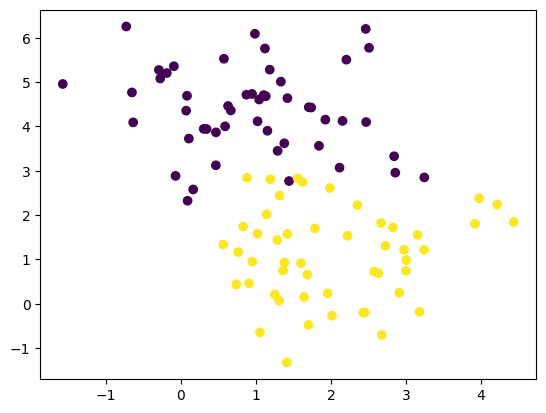

In [84]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

# Create a scatter plot of the data
print('X shape:', X.shape)
print('y shape:', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

### Initialization

Now we will create an **initialization function** to properly initialize the parameters **$W$** and **$b$** of our linear model.

The parameter **$W$** must be shaped accordingly — it needs to **interact with each component** of the input.

The bias **$b$** is a simple number added after the linear transformation, no big deal.

Here, the input **$X$** has **2 dimensions**, meaning we can represent each data point on two axes:  
$X = (x_1, x_2)$

So:
- **$W$** should be a 2D vector (with 2 components)
- **$b$** is a number


In [85]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return W, b

W, b = initialisation(X)
print(W.shape, b.shape)
print(W, b)

(2, 1) (1,)
[[-0.54015893]
 [ 0.22954446]] [-0.67673394]


We see that:

- **$W$** is a **vector with 2 rows and 1 column**, it has shape **(2, 1)**  
  This matches the input dimension of $x = (x_1, x_2)$

- **$b$** is a **single real number**, it has shape **(1,)**  

### The Model: Neuron Behavior

The core of our neuron. The question we're answering is: **how does the neuron process the information it receives?**

**A neuron processes the input linearly**, but we add intelligence through a **non-linear activation function** : The neuron will "activate" based on this non-linear rule.

So let $Z = W * X + b$ be the linear transformation of the input data and $A = \text{sigmoid}(Z)$ be the activation function.

In [86]:
def model(X, W, b):
    Z = np.dot(X, W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

A = model(X, W, b)
print(A.shape)

(100, 1)


### Cost Function: Log Loss

This cost function called log-loss returns a real number that quantifies the error between the model's prediction and the actual target.


In [87]:
def log_loss(A, y):
    m = len(y)
    loss = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return loss

loss = log_loss(A, y)
print(loss)


1.1976164812989347


We have a real number, great. This  number is **the average prediction error**. Our goal is to **minimize** this value during training.

### Gradients

Now we handle the **gradients**.

Gradients give us the **direction and rate of change** of the cost function with respect to the parameters $W$ and $b$.

They tell us **how to adjust** each parameter to **reduce the cost** — that's the essence of learning.

We'll compute:
- $\frac{\partial \mathcal{L}}{\partial W}$
- $\frac{\partial \mathcal{L}}{\partial b}$

These will be used in the next step to update the model.


In [88]:
def gradients(A, X, y):
    m = len(y)
    dZ = A - y
    dW = 1/m * np.dot(X.T, dZ)
    db = 1/m * np.sum(dZ)
    return dW, db

dW, db = gradients(A, X, y)
print("dW = ", dW)
print("db = ", db)

dW =  [[-0.71132815]
 [ 0.60007192]]
db =  -0.1754119200616765


We still have the two-dimensional vector $W$ and the real number $b$, the dimensions are respected.

### Parameter Update

Now that we have the **direction** (gradients), we update the model parameters.

We move the parameters **slightly in the direction that reduces the cost** — this is the principle of **gradient descent**.

Update rules:
- $W = W - \alpha \cdot \frac{\partial \mathcal{L}}{\partial W}$
- $b = b - \alpha \cdot \frac{\partial \mathcal{L}}{\partial b}$

Here, $\alpha$ is the **learning rate** — it controls how big each update step is.

By repeating this process, the model gradually finds better parameters.


In [89]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return W, b

W, b = update(dW, db, W, b, learning_rate=0.1)
print("W = ", W)
print("b = ", b)

W =  [[-0.46902612]
 [ 0.16953726]]
b =  [-0.65919274]


We can see here the updates of (W, b) is well-handed, check the computation (don't forget the learning rate).

### Training Loop: Putting It All Together

Now we bring all the previous functions together into a single **training architecture**.

This is where **learning** happens.

We only provide:
- the inputs `X`
- the ground truth labels `y`

The function handles:
1. Initialization of $(W, b)$  
2. model prediction
3. Cost computation  
4. Gradient calculation  
5. Parameter updates (using learning rate)  

This process is repeated over multiple iterations to train the model.


In [90]:
def artificial_neuron_test(X, y, learning_rate=0.1, num_iter=100):
    # initializer parameters
    W, b = initialisation(X)

    # error visualization : plotting the loss at each iteration
    loss = []

    for i in range(num_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    plt.plot(loss)
    plt.show

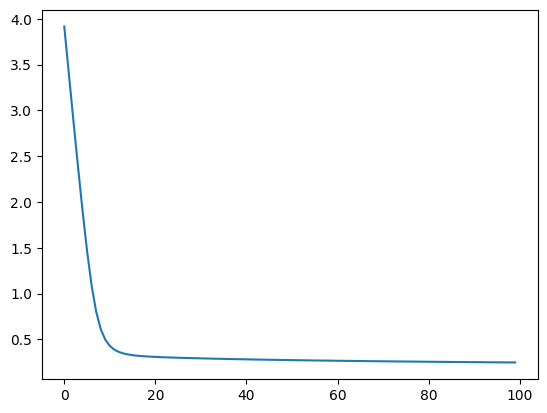

In [91]:
artificial_neuron_test(X, y)

We can see how the model’s error evolves with each iteration — this is called **the learning curve**.

We trained the model for 100 iterations, which means the model had 100 training sessions (or **epochs**) to improve.

## We now have a trained artificial neuron after 100 epochs, and we can use it to make predictions.


But everything is already in place for making predictions, since we just trained our model on our data.  
### Let’s consider the following scenario:

We measured the width and length of leaves from 100 different plants.  
We plotted these measurements on a graph with two axes: width and length. These form our input data `X`.

For each plant, we also knew whether it was toxic or not.  
This information is represented by the target values `y` in our model.

We trained the model and now want to evaluate how well it performs.  
For each plant, we check what the model would have predicted (toxic or not?), and compare it with the ground truth (was the plant actually toxic or not?).

This allows us to measure the **accuracy** of the model’s predictions.

Note: We are no longer talking about the *loss* function used during training (which helps improve the model), but about the **final prediction accuracy**: Did the model correctly classify the plant as toxic or non-toxic? Out of 100 plants, how many times did it make a wrong prediction?

## How do we build the prediction function ?

Simple. How does our neuron predict the output based on the input?  
Using its **linear model** `Z` and the **activation function** `A`.

The output `A` is a probability between 0 and 1.

So we can simply say:

- If `A > 0.5`, then the plant is **more likely** to be toxic → we return `True`
- Otherwise → we return `False`

In [92]:
def predict(X, W, b):
    A = model(X, W, b)
    #print(A)
    return A >= 0.5

The advantage is that for each prediction, we can trace back to the actual probability that led to the decision.  
If the probability is close to 0 or 1, we can trust the result more.  
But if it's close to 0.5, the prediction is more uncertain, and thus more likely to be incorrect.

To measure the model's **accuracy**, we count how many predictions are correct out of the total.


In [93]:
from sklearn.metrics import accuracy_score

## Now let’s see the neuron’s predictions for the 100 plants.


In [94]:
def artificial_neuron(X, y, learning_rate=0.1, num_iter=100):
    # initializer parameters
    W, b = initialisation(X)

    # error visualization : plotting the loss at each iteration
    loss = []

    for i in range(num_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    # Loop finished, best set parameters (W, b)

    y_pred = predict(X, W, b)
    print('accuracy score :', accuracy_score(y, y_pred))

    plt.plot(loss)
    plt.show

    print("final set parameters :", W, b)
    return W, b

accuracy score : 0.92
final set parameters : [[ 0.76146918]
 [-1.03022254]] [1.27584372]


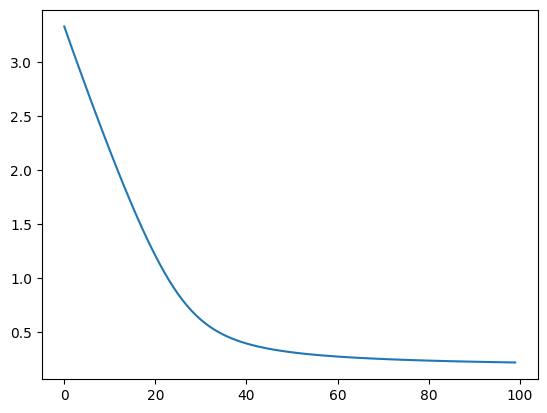

In [95]:
W, b = artificial_neuron(X, y)

You might get an accuracy score of 0.92 or 0.86, for example.

This means that in 86% of the cases, the neuron correctly predicted whether a plant was toxic or not  
(based on its leaf length and width).

You also get the final parameters W and b, which represent the best-trained model after 100 iterations.  
This is confirmed by the fact that the loss curve reaches its minimum at the end.


## Prediction of a new data

What if you come with a new plant ? let's see.

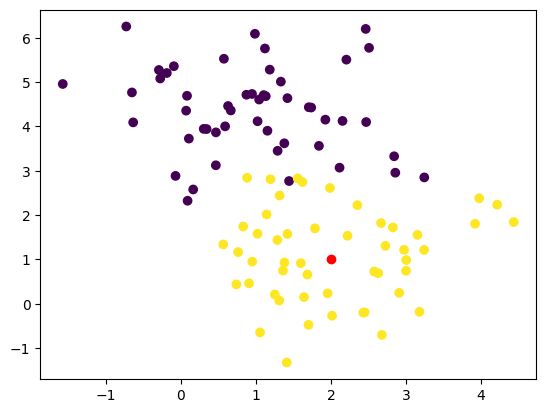

In [96]:
new_plant = np.array([2, 1])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(new_plant[0], new_plant[1], c='r')

plt.show()

The new plant, based on its leaves width/length, is situated here, in red on the graph.

Let's look at the model prediction for this red dot.

In [97]:
def predict_plant(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

predict_plant(new_plant, W, b)

[0.85427844]


array([ True])

You get `True` because the predicted probability is 0.93, which is greater than 0.5, so the plant belongs to the toxic ones.

So, according to the model, this plant is classified as toxic.

And we can trust this result with 93% confidence.


Now we better understand how the neuron classifies new data.

Some points will be classified with high confidence (probability close to 0 or 1),  
while others will fall near 0.5, where predictions are more uncertain.

If we visualize all points with a probability of exactly 0.5,  
we get a boundary — the model can’t confidently classify points near it.

This is called the **decision boundary**.

An infinitesimal move outside this boundary allows the model to make a decision.


## Let’s plot the decision boundary on the graph.

From the math behind the activation function,  
saying that `a = 0.5` is equivalent to saying that `z = 0`.


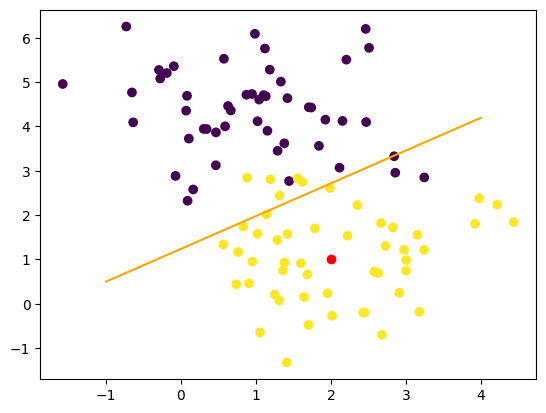

In [98]:
new_plant = np.array([2, 1])

x1 = np.linspace(-1, 4, 100)
x2 = (-W[0] * x1 - b) / W[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(new_plant[0], new_plant[1], c='r')
plt.plot(x1, x2, c='orange')
plt.show()

We observe several very interesting things here.

First, we clearly see the **linear model** learned by the neuron — this model acts as a decision boundary between the two classes (toxic / non-toxic).

Next, we notice that the **red point** (classified as toxic) was reasonably easy to classify — it is **far from the decision boundary**, so the model had **high confidence** in this prediction.

However, as we get **closer to the decision boundary**, **errors become more frequent**.  
That’s expected: when the prediction probability is around 50%, there’s basically a **coin toss** situation — the model is **uncertain**, and it's more likely to make mistakes.

This highlights an important limitation:  
Even if we give the neuron **a lot of time to learn** (a large number of training iterations, so called epochs remember), a **linear model** can only go so far. There are **inherent limits** to its performance.


In [99]:
#%pip install plotly

import plotly.graph_objects as go

Gift for those who download and run this notebook :

In [100]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])
fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [101]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))
fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

## For those who don't, no worries :

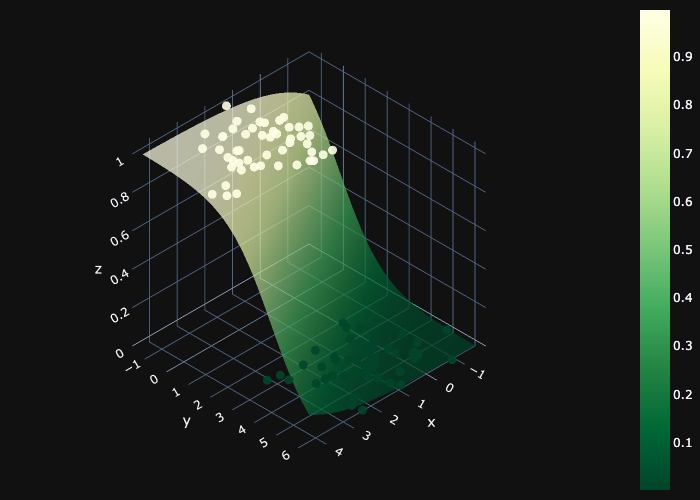

In [102]:
#%pip install -U kaleido
import plotly.graph_objects as go
import numpy as np
from IPython.display import Image

X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity=0.7, reversescale=True)])
fig.add_scatter3d(
    x=X[:, 0].flatten(), 
    y=X[:, 1].flatten(), 
    z=y.flatten(), 
    mode='markers', 
    marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity=0.9, reversescale=True)
)
fig.update_layout(template="plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"

fig.write_image("figure.png")

Image("figure.png")

We can clearly see here how the **sigmoid function** (our activation function)  
helps to classify the different plants into two categories: **toxic** or **non-toxic**.

The sigmoid outputs a value between 0 and 1, up and down.

- If the output is close to 1 → the model predicts the plant is **toxic**
- If the output is close to 0 → the model predicts the plant is **non-toxic**

This is why the sigmoid is commonly used in binary classification problems.


# So congrats, you just understood a binary classification model.

In real life, we don't just work with 2 variables. Datasets can contain 10, 100, or even 10,000 variables.  
In such cases, it's impossible to visualize the data in 2D plots like the ones we use here for intuition.

**This is why we use metrics such as the _learning curve_** to evaluate the performance and training quality of a neural network model.

In the code below, we perform matrix operations, which means the implementation is already compatible with higher-dimensional datasets.  

Try the following:
- Change the number of input features in `X` (e.g., go from 2 to 5 or 10 variables),
- Play around with the **hyperparameters** like `learning_rate` and `num_iter`,  
to observe **how these affect the neuron’s learning behavior**.

This will help you understand the **sensitivity of the model** to hyperparameter changes.
